In [1]:
# Main imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pdb

import matplotlib.gridspec as gridspec

from helper_functions import \
    thermodynamic_model, \
    plot_manifold_model, \
    plot_manifold_measurements, \
    get_clonal_measurements_df, \
    get_resampled_params_df, \
    get_distance_params_df

%matplotlib inline

#
# Set global styles
#

textwidth=5.5
halfcolwidth=3
fontsize=8
titlesize=10
panel_label_size=12
markersize=5
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['text.usetex'] = False

# Get default colors
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

def annotate_regime(x,y,n,color):
    ax.plot(x,y,'o',
            markersize=15,
            markeredgecolor=color,
            markerfacecolor='white',
            markeredgewidth=.5)
    ax.text(x,y,'%d'%n,
            color=color,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=8,
            fontweight='regular')
    
# Conversion parameter
kbt_to_kcal = 1/1.62
    
# Load results in data frames
data_df = get_clonal_measurements_df()
c61_model_df = get_resampled_params_df('c61')
ocl_model_df = get_resampled_params_df('occlusion')
distance_df = get_distance_params_df()

In [ ]:
### Figure 1: Occlusion theory ###

fig, _ = plt.subplots(figsize=[textwidth,3])
color='black'

gs = gridspec.GridSpec(1, 1, top=.98, bottom=.12, left=.62, right=.98)
ax = plt.subplot(gs[0,0])

Rs = np.logspace(-5,4,100)

tau=1
alpha=0
F=100
beta=10
t_bg=1E-4
lim = np.array([1E-5,1E1])

alpha_prime = (1+alpha*F)/(1+F)
beta_prime = (1+alpha*beta*F)/(1+alpha*F)

# print 'alpha_prime / alpha = %f'%(alpha_prime/alpha)
# print 'beta_prime / beta = %f'%(beta_prime/beta)

xs = thermodynamic_model(t_sat=tau, P=Rs, F=0, alpha=alpha, beta=beta, t_bg=t_bg)
ys = thermodynamic_model(t_sat=tau, P=Rs, F=F, alpha=alpha, beta=beta, t_bg=t_bg)

#lim = np.array([.1*min(min(xs),min(ys)), 10*max(max(xs),max(ys))])

ax.set_ylabel("$t_+$ (log scale) $\\longrightarrow$")
ax.set_xlabel("$t_-$ (log scale) $\\longrightarrow$")

# gridlines
ax.axvline(t_bg,linestyle=':',color='k', alpha=.5)
ax.loglog(lim,lim,':', color='k', alpha=.5)
ax.axhline(tau,linestyle=':',color='k', alpha=.5)

# background line
ax.axhline(t_bg,linestyle='--',color='r', alpha=.5)

# maximal activation line
ax.loglog(lim,alpha_prime*lim,'--',color='g', alpha=.5)

# saturation line
ax.axvline(tau,linestyle='--',color='b', alpha=.5)

# activation curve
ax.loglog(xs,ys, linewidth=3, solid_capstyle='round', color=color)
ax.loglog(tau,beta_prime*tau,markersize=8,marker='o',color=color)
ax.loglog(t_bg,t_bg,markersize=8,marker='o',color=color)

# Annotate regimes
annotate_regime(t_bg/2.5,t_bg/2.5,n=1,color='k')
annotate_regime(t_bg*5,t_bg/2.5,n=2,color='k')
annotate_regime(tau*2E-1,alpha_prime*tau*1.5E-1/3,n=3,color='k')
annotate_regime(tau*2.5,tau/4,n=4,color='k')
annotate_regime(tau*2.5,tau*2.5,n=5,color='k')

# annotation of maximal repression level
arrow_x = 1E-1
arrow_yhi = arrow_x/1.5
arrow_ylo = arrow_x*alpha_prime*1.5
arrow_ymid = np.sqrt(arrow_ylo*arrow_yhi)/2
ax.annotate('',
            xy=(arrow_x, arrow_ylo), 
            xytext=(arrow_x, arrow_yhi),
            arrowprops={'arrowstyle':'<->'})
ax.text(arrow_x/1.5, arrow_ymid, '$1+F$', horizontalalignment='right', verticalalignment='center')

# tickmarks
ax.set_yticks([t_bg, tau])
ax.set_yticklabels(['$t_{bg}$', '$t_{sat}$'])
ax.set_xticks([t_bg, tau])
ax.set_xticklabels(['$t_{bg}$', '$t_{sat}$'])
ax.get_xaxis().set_tick_params(which='minor', size=0) 
ax.get_yaxis().set_tick_params(which='minor', size=0)
# ax.xaxis.tick_top()
# ax.yaxis.tick_right()

# Set limits and aspect
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

plt.figtext(.01,.98,'(A)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.01,.45,'(B)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.50,.98,'(C)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')

fig.savefig('figure_1.pdf', transparent=True)

In [ ]:
### Figure 2: Occlusion measurements ###

fig, _ = plt.subplots(figsize=[halfcolwidth,3.5])

gs = gridspec.GridSpec(1, 1, top=.70, bottom=.12, left=.16, right=.98)
ax = plt.subplot(gs[0,0])

# Plot styles
samples_labels_colors = [
    ('61c-ocl.35L', '+4.5', colors[0]),
    ('oc0.35', '+0.5', colors[1]),
]

# Extract best fit model
t_sat_best = np.exp(ocl_model_df.loc['best','log_tsat'])
t_bg_best = np.exp(ocl_model_df.loc['best','log_tbg'])
F_best = np.exp(ocl_model_df.loc['best','log_C'])

# Extract sampled fits
t_sat_sampled = np.exp(ocl_model_df['log_tsat'].values[1:])
t_bg_sampled = np.exp(ocl_model_df['log_tbg'].values[1:])
F_sampled = np.exp(ocl_model_df['log_C'].values[1:])

# Plot sampled models
for (t_sat, t_bg, F) in zip(t_sat_sampled, t_bg_sampled, F_sampled):
    plot_manifold_model(ax=ax, 
                    t_sat=t_sat,
                    t_bg=t_bg,
                    alpha=0,
                    beta=1,
                    F=F,
                    color='silver',
                    opacity=.1
                    )
print('%d bootstrap samples'%len(F_sampled))

# Plot best fit model
plot_manifold_model(ax=ax, 
                    t_sat=t_sat_best,
                    t_bg=t_bg_best,
                    alpha=0,
                    beta=1,
                    F=F,
                    color='black',
                    label='fit',
                    opacity=1
                    )
# Plot measurements
plot_manifold_measurements(ax=ax, 
                           df=data_df, 
                           samples_labels_colors=samples_labels_colors, 
                           markersize=markersize, 
                           fontsize=fontsize)

# Display Delta G
ocl_DeltaG = -kbt_to_kcal*np.log(F_best)
ocl_dDeltaG = kbt_to_kcal*np.std(np.log(F_sampled))
dF_plus = np.exp(np.log(F_best) + np.std(np.log(F_sampled))) - F_best
dF_minus = F_best - np.exp(np.log(F_best) - np.std(np.log(F_sampled)))

lim = [5E-4,1E2]
text =  '$\Delta G_F = %0.2f \pm %0.2f$ kcal/mol\n'%(ocl_DeltaG,ocl_dDeltaG) + \
        '$F = %.1f^{+%.1f}_{-%.1f}$'%(F_best, dF_plus, dF_minus) 
ax.text(x=lim[0]*2, y=lim[1]/2, s=text, fontsize=fontsize,
        horizontalalignment='left', 
        verticalalignment='top')
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

    
# Tight layout

plt.figtext(.01,.98,'(A)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(.01,.73,'(B)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
    
fig.savefig('figure_2.pdf', transparent=True)

In [ ]:
### Figure 3: Recruitment theory ###

fig, _ = plt.subplots(figsize=[textwidth,3])
color='black'

gs = gridspec.GridSpec(1, 1, top=.98, bottom=.12, left=.62, right=.98)
ax = plt.subplot(gs[0,0])

lim = np.array([1E-5,1E1])

Rs = np.logspace(-7,1,100)

tau=1
alpha=100
F=100
beta=1
t_bg=1E-4

alpha_prime = (1+alpha*F)/(1+F)
beta_prime = (1+alpha*beta*F)/(1+alpha*F)

print('alpha_prime / alpha = %f'%(alpha_prime/alpha))
print('beta_prime / beta = %f'%(beta_prime/beta))

xs = thermodynamic_model(t_sat=tau, P=Rs, F=0, alpha=alpha, beta=beta, t_bg=t_bg)
ys = thermodynamic_model(t_sat=tau, P=Rs, F=F, alpha=alpha, beta=beta, t_bg=t_bg)

#lim = np.array([.1*min(min(xs),min(ys)), 10*max(max(xs),max(ys))])

ax.set_ylabel("$t_+$ (log scale) $\\longrightarrow$")
ax.set_xlabel("$t_-$ (log scale) $\\longrightarrow$")

# gridlines
ax.axhline(t_bg,linestyle=':',color='k', alpha=.5)
ax.loglog(lim,lim,':', color='k', alpha=.5)
ax.axvline(tau,linestyle=':',color='k', alpha=.5)
#ax.axhline(tau,linestyle=':',color='k', alpha=.5)

# background line
ax.axvline(t_bg,linestyle='--',color='r', alpha=.5)

# maximal activation line
ax.loglog(lim,alpha_prime*beta_prime*lim,'--',color='g', alpha=.5)

# saturation line
ax.axhline(beta_prime*tau,linestyle='--',color='b', alpha=.5)

# activation curve
ax.loglog(xs,ys, linewidth=3, solid_capstyle='round', color=color)
ax.loglog(tau,beta_prime*tau,markersize=8,marker='o',color=color)
ax.loglog(t_bg,t_bg,markersize=8,marker='o',color=color)

# Annotate regimes
annotate_regime(t_bg/3,t_bg/3,n=1,color='k')
annotate_regime(t_bg/3,t_bg*10,n=2,color='k')
annotate_regime(tau*.5E-3,alpha_prime*beta_prime*tau*2.5E-3,n=3,color='k')
annotate_regime(tau/8,beta_prime*tau*3,n=4,color='k')
annotate_regime(tau*3,beta_prime*tau*3,n=5,color='k')

# annotation of maximal activation level
arrow_x = 1E-3
arrow_yhi = arrow_x*beta_prime*alpha_prime/2
arrow_ylo = arrow_x*1.5
arrow_ymid = np.sqrt(arrow_ylo*arrow_yhi)*1.5
ax.annotate('',
            xy=(arrow_x, arrow_ylo), 
            xytext=(arrow_x, arrow_yhi),
            arrowprops={'arrowstyle':'<->'})
ax.text(arrow_x*1.5, arrow_ymid, '$\\alpha\'$', horizontalalignment='left', verticalalignment='center')

# tickmarks
ax.set_yticks([t_bg, tau])
ax.set_yticklabels(['$t_{bg}$', '$t_{sat}$'])
ax.set_xticks([t_bg, tau])
ax.set_xticklabels(['$t_{bg}$', '$t_{sat}$'])
ax.get_xaxis().set_tick_params(which='minor', size=0) 
ax.get_yaxis().set_tick_params(which='minor', size=0)
# ax.xaxis.tick_top()
# ax.yaxis.tick_right()

# Set limits and aspect
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

plt.figtext(.01,.98,'(A)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.01,.45,'(B)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.50,.98,'(C)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')

fig.savefig('figure_3.pdf', transparent=True)

100 bootstrap samples
-61.5: DeltaG = -3.95 +/- 0.09


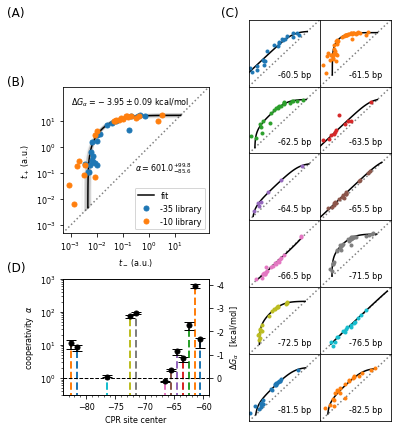

In [2]:
### Figure 4: Recruitment data ###

fig, _ = plt.subplots(figsize=[textwidth,6])

lim = [5E-4,2E2]

### Panel A

gs = gridspec.GridSpec(1, 1, top=.80, bottom=.45, left=.15, right=.52)
ax = plt.subplot(gs[0,0])

# Plot styles
samples_labels_colors = [
    ('c61r18.35L', '-35 library', colors[0]),
    ('c61r18.10L', '-10 library', colors[1]),
]

# Extract best fit model
t_sat_best = np.exp(c61_model_df.loc['best','log_tsat'])
t_bg_best = np.exp(c61_model_df.loc['best','log_tbg'])
eta_best = np.exp(c61_model_df.loc['best','log_eta'])


# Extract sampled fits
t_sat_sampled = np.exp(c61_model_df['log_tsat'].values[1:])
t_bg_sampled = np.exp(c61_model_df['log_tbg'].values[1:])
eta_sampled = np.exp(c61_model_df['log_eta'].values[1:])

# Plot sampled models
for (t_sat, t_bg, eta) in zip(t_sat_sampled, t_bg_sampled, eta_sampled):
    plot_manifold_model(ax=ax, 
                    t_sat=t_sat,
                    t_bg=t_bg,
                    alpha=eta,
                    F = 1000,
                    color='silver',
                    opacity=.1,
                    )
print('%d bootstrap samples'%len(eta_sampled))

# Plot best fit model
plot_manifold_model(ax=ax, 
                    t_sat=t_sat_best,
                    t_bg=t_bg_best,
                    alpha=eta_best,
                    F = 1000,
                    color='black',
                    label='fit',
                    )
# Plot measurements
plot_manifold_measurements(ax=ax, 
                           df=data_df, 
                           samples_labels_colors=samples_labels_colors, 
                           markersize=markersize, 
                           fontsize=fontsize,
                           lim=lim)

# Display Delta G
#plt.title('$\Delta G_\\alpha = %0.2f \pm %0.2f$ kcal/mol'%(c61_DeltaG,c61_dDeltaG))
#ax.text(x=1E0, y=3E-2, s='$\\alpha = 601^{+76}_{-86}$')
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

# Compute energy for c61
alpha_best = eta_best
alpha_sampled = eta_sampled
kbt_to_kcal = 1/1.62

c61_DeltaG = -kbt_to_kcal*np.log(alpha_best)
c61_dDeltaG = kbt_to_kcal*np.std(np.log(alpha_sampled))
print('-61.5: DeltaG = %0.2f +/- %0.2f'%(c61_DeltaG, c61_dDeltaG))

dalpha_plus = np.exp(np.log(alpha_best) + np.std(np.log(alpha_sampled))) - alpha_best
dalpha_minus = alpha_best - np.exp(np.log(alpha_best) - np.std(np.log(alpha_sampled)))

text_1 = '$\\Delta G_\\alpha = %0.2f \\pm %0.2f$ kcal/mol\n'%(c61_DeltaG, c61_dDeltaG)
text_2 = '$\\alpha = %.1f^{+%.1f}_{-%.1f}$'%(alpha_best, dalpha_plus, dalpha_minus) 
ax.text(x=lim[0]*2, y=lim[1]/2, s=text_1, fontsize=fontsize,
        horizontalalignment='left', 
        verticalalignment='top')
ax.text(x=3E-1, y=3E-1, s=text_2, fontsize=fontsize,
        horizontalalignment='left', 
        verticalalignment='top')
#ax.set_title('CRP at -61.5 bp')

### Panel B
gs = gridspec.GridSpec(6, 2, top=.95, bottom=.02, left=.62, right=.98, wspace=.0, hspace=.0)

samples_dists = [
    ('c60',60.5), 
    ('c61',61.5),
    ('c62',62.5), 
    ('c63',63.5), 
    ('c64',64.5),
    ('c65',65.5),
    ('c66',66.5),
    ('c71',71.5), 
    ('c72',72.5),
    ('c76',76.5),
    ('c81',81.5),
    ('c82',82.5)]

# Get default color list
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

for n, pair in enumerate(samples_dists):
    row = int(n/2)
    col = n%2
    
    ax = plt.subplot(gs[row,col])
    
    sample = pair[0]
    dist = pair[1]
    
    color = colors[n%len(colors)]
    #x.set_aspect(1)
    samples_labels_colors = [(sample,None,color)]
    
    t_sat = distance_df.loc[dist,'tsat']
    t_bg = distance_df.loc[dist,'tbg']
    alpha = distance_df.loc[dist,'alpha']
    
    # Plot model
    plot_manifold_model(ax, t_sat=t_sat, t_bg=t_bg, alpha=alpha, F=1000, color='black')
    
    # Plot measurements, 
    plot_manifold_measurements(ax,data_df,samples_labels_colors, 
                               markersize=3, xlabel='', ylabel='', 
                               fontsize=9, show_legend=False, lim=lim)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Set title
    ax.text(x=1E-1, y=3E-3, s='-%.1f bp'%dist, fontsize=fontsize)
    #ax.set_title('-%.1f bp'%dist)
    
### Panel C

gs = gridspec.GridSpec(1, 1, top=.35, bottom=.08, left=.15, right=.52)
ax = plt.subplot(gs[0,0])

# Get data
distances = -distance_df.index
xlim = [min(distances)-1.5, max(distances)+1.5]
alpha = distance_df['alpha']
dalpha_low = distance_df['alpha'] - distance_df['alpha_16']
dalpha_hi = distance_df['alpha_84'] - distance_df['alpha']

### Plot alphas
alpha_lims = np.array([3E-1,1E3])
ax.errorbar(distances,alpha,
            yerr=[dalpha_hi, dalpha_low], 
            linestyle='none', marker='o', 
            markersize=markersize, capsize=markersize, color='k')
#ax.stem(distances,alpha,bottom=1,linefmt=':',markerfmt='.k')
ax.set_yscale("log", nonposy='clip')
ax.set_ylim(alpha_lims)
ax.axhline(1, linestyle='--', color='k', linewidth=1)
ax.set_ylabel('cooperativity  $\\alpha$')
ax.set_xlim(xlim)
#ax.set_xticks([])
#ax.set_xlabel('')
ax.set_xlabel('CPR site center')

# Show minor tick marks on x
from matplotlib.ticker import AutoMinorLocator
minorLocator = AutoMinorLocator()
ax.xaxis.set_minor_locator(minorLocator)

# Draw stems
for d, a in zip(distances,alpha):
    ax.plot([d,d], [.1,a], '--', linewidth=2, zorder=-100)

energy_lims = np.log(alpha_lims)/1.62
ax2 = ax.twinx()
ax2.set_ylim(energy_lims)
ax2.set_ylabel('$\\Delta G_\\alpha$   [kcal/mol]')
ax2.set_yticks([0,1,2,3,4])
ax2.set_yticklabels([0,-1,-2,-3,-4])

    
# Tight layout
panel_label_size=12
plt.figtext(.01,.98,'(A)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(.01,.82,'(B)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(.55,.98,'(C)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
#plt.figtext(.50,.82,'(D)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(.01,.39,'(D)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
    
fig.savefig('figure_4.pdf', transparent=True)



In [ ]:
### Figure 5: Acceleration model ###

# Create figure and axes
fig, axs = plt.subplots(figsize=[textwidth,3.5])
color='black'

gs = gridspec.GridSpec(1, 1, top=.98, bottom=.12, left=.62, right=.98)
ax = plt.subplot(gs[0,0])

lim = np.array([1E-5,1E1])

Rs = np.logspace(-7,1,100)

tau=1
alpha=10
F=100
beta=30
t_bg=1E-4

alpha_prime = (1+alpha*F)/(1+F)
beta_prime = (1+alpha*beta*F)/(1+alpha*F)

print('alpha_prime / alpha = %f'%(alpha_prime/alpha))
print('beta_prime / beta = %f'%(beta_prime/beta))

# Compute expression manifold
xs = thermodynamic_model(t_sat=tau, P=Rs, F=0, alpha=alpha, beta=beta, t_bg=t_bg)
ys = thermodynamic_model(t_sat=tau, P=Rs, F=F, alpha=alpha, beta=beta, t_bg=t_bg)

# gridlines
ax.axhline(t_bg,linestyle=':',color='k', alpha=.5)
ax.loglog(lim,lim,':', color='k', alpha=.5)
ax.axvline(tau,linestyle=':',color='k', alpha=.5)
ax.axhline(tau,linestyle=':',color='k', alpha=.5)

# background line
ax.axvline(t_bg,linestyle='--',color='r', alpha=.5)

# maximal activation line
ax.loglog(lim,alpha_prime*beta_prime*lim,'--',color='g', alpha=.5)

# saturation line
ax.axhline(beta_prime*tau,linestyle='--',color='b', alpha=.5)

# activation curve
ax.loglog(xs,ys, linewidth=3, solid_capstyle='round', color=color)
ax.loglog(tau,beta_prime*tau,markersize=8,marker='o',color=color)
ax.loglog(t_bg,t_bg,markersize=8,marker='o',color=color)

# Annotate regimes
annotate_regime(t_bg/3,t_bg/3,n=1,color='k')
annotate_regime(t_bg/3,t_bg*10,n=2,color='k')
annotate_regime(tau*1E-3,alpha_prime*beta_prime*tau*8E-3,n=3,color='k')
annotate_regime(tau/4,beta_prime*tau*3,n=4,color='k')
annotate_regime(tau*3,beta_prime*tau*3,n=5,color='k')

# annotation of maximal activation level
arrow_x = 3E-3
arrow_yhi = arrow_x*beta_prime*alpha_prime/2
arrow_ylo = arrow_x*1.5
arrow_ymid = np.sqrt(arrow_ylo*arrow_yhi)*1.5
ax.annotate('',
            xy=(arrow_x, arrow_ylo), 
            xytext=(arrow_x, arrow_yhi),
            arrowprops={'arrowstyle':'<->'})
ax.text(arrow_x*1.5, arrow_ymid, '$\\alpha\' \\beta\'$', horizontalalignment='left', verticalalignment='center')

# annotation of regime 5
arrow_x = tau
arrow_yhi = arrow_x*beta_prime/2
arrow_ylo = arrow_x*1.5
arrow_ymid = np.sqrt(arrow_ylo*arrow_yhi)*1.5
ax.annotate('',
            xy=(arrow_x, arrow_ylo), 
            xytext=(arrow_x, arrow_yhi),
            arrowprops={'arrowstyle':'<->'})
ax.text(arrow_x*1.5, arrow_ymid, '$\\beta\'$', horizontalalignment='left', verticalalignment='center')

# tickmarks
ax.set_yticks([t_bg, tau, tau*beta_prime])
ax.set_yticklabels(['$t_{bg}$', '$t_{sat}$', '$\\beta\' t_{sat}$'])
ax.set_xticks([t_bg, tau])
ax.set_xticklabels(['$t_{bg}$', '$t_{sat}$'])
ax.get_xaxis().set_tick_params(which='minor', size=0) 
ax.get_yaxis().set_tick_params(which='minor', size=0)
ax.set_ylabel("$t_+$ (log scale) $\\longrightarrow$")
ax.set_xlabel("$t_-$ (log scale) $\\longrightarrow$")
# ax.xaxis.tick_top()
# ax.yaxis.tick_right()

# Set limits and aspect
ax.set_xlim(lim)
ax.set_ylim([lim[0], 50*lim[1]])
ax.set_aspect('equal')

plt.figtext(.01,.98,'(A)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
# plt.figtext(.01,.45,'(B)', fontsize=panel_label_size, horizontalalignment='left', 
#             verticalalignment='top')
plt.figtext(.50,.98,'(B)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')

plt.savefig('figure_5.pdf')


In [ ]:
### Figure 6: Acceleration data ###

# Create figure and axes
fig, _ = plt.subplots(figsize=[textwidth,2.5])
color='black'

gs = gridspec.GridSpec(2, 2, top=.98, bottom=.18, left=.12, right=.98, wspace=.4)
ax = plt.subplot(gs[:,1])

# Specify which data points to plot in which colors
samples_labels_colors = [
    ('c61', '-10/-35 libraries', 'silver'),
    ('r17.35con10L','con -10 library',colors[9]),
    ('r17.10con35L','con -35 library',colors[2]),
]

# background line
#ax.axvline(t_bg_best,linestyle='--',color='r', alpha=.5)

#saturation line
ax.axhline(t_sat_best,linestyle='--',color='black')
ax.axvline(t_sat_best,linestyle='--',color='black')

# Draw best fit model
plot_manifold_model(ax, t_sat=t_sat_best, t_bg=t_bg_best, alpha=alpha_best, beta=1, F = 1000,
                    color='gray', label='-61.5 fit')
    
# Draw measurements
plot_manifold_measurements(ax, data_df, samples_labels_colors, 
                           markersize=markersize, 
                           fontsize=fontsize)
ax.set_aspect('equal')


### variable distance acceleration plot
ax = plt.subplot(gs[1,0])

# Plot tsat, but only if error bar is small enough
tsat = distance_df['tsat']
dtsat_low = distance_df['tsat'] - distance_df['tsat_16']
dtsat_hi = distance_df['tsat_84'] - distance_df['tsat']
ind = (distance_df['tsat_84'] / distance_df['tsat_16'] < 1E2)
ind &= (distances != -66.5)

tsat_ref = distance_df.loc[61.5, 'tsat']

tsat_med = np.median(tsat[ind])
ax.axhline(tsat_med/tsat_ref, linestyle='--', color='k', linewidth=1)
ax.errorbar(distances[ind], 
            tsat[ind]/tsat_ref,
            yerr=[dtsat_hi[ind]/tsat_ref, dtsat_hi[ind]/tsat_ref], 
            linestyle='none', 
            marker='o', 
            markersize=markersize, 
            capsize=markersize, 
            color='k')

ax.set_yscale("log", nonposy='clip')
ax.set_ylim([.1,10])
ax.set_xlim(xlim)
ax.set_ylabel('acceleration  $\\beta$')
ax.set_xlabel('CPR site center')

# Show minor tick marks on x
from matplotlib.ticker import AutoMinorLocator
minorLocator = AutoMinorLocator()
ax.xaxis.set_minor_locator(minorLocator)

# Draw stems
tsat = tsat.values/tsat_ref
ind = ind.values
for n, d in enumerate(distances):
    t = tsat[n]
    if ind[n]:
        ax.plot([d,d], [.01,t], '--', linewidth=2, zorder=-100)
    else:
        ax.plot([d,d], [.01,.02], '--', linewidth=2, zorder=-100)

        
plt.figtext(.01,.98,'(A)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(.50,.98,'(B)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(.01,.65,'(C)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')

        
fig.savefig('figure_6.pdf', transparent=True)

In [16]:
fontsize=16
titlesize=18
markersize=8
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['text.usetex'] = False
big_figure=[7,7]

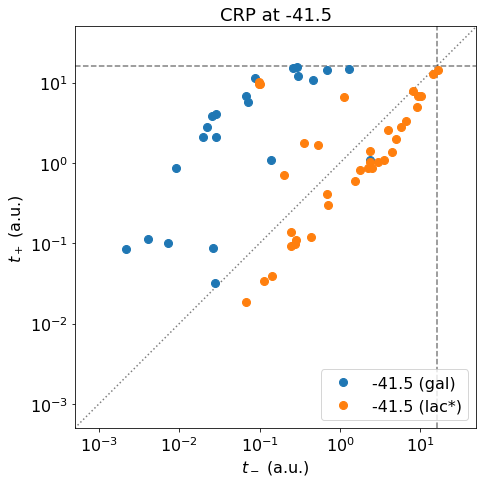

In [17]:
### CRP at -41.5

fig, ax = plt.subplots(figsize=big_figure)

# Plot styles
samples_labels_colors = [
    ('gal.', '-41.5 (gal)', colors[0]),
    ('c41', '-41.5 (lac*)', colors[1]),
]

# Plot measurements
ax.axhline(t_sat_best,linestyle='--',color='gray')
ax.axvline(t_sat_best,linestyle='--',color='gray')

plot_manifold_measurements(ax=ax, 
                           df=data_df, 
                           samples_labels_colors=samples_labels_colors, 
                           markersize=8, 
                           fontsize=fontsize)
ax.set_aspect('equal')
ax.set_title('CRP at -41.5', fontsize=titlesize)
plt.tight_layout()

fig.savefig('presentation_c41.pdf', transparent=True)

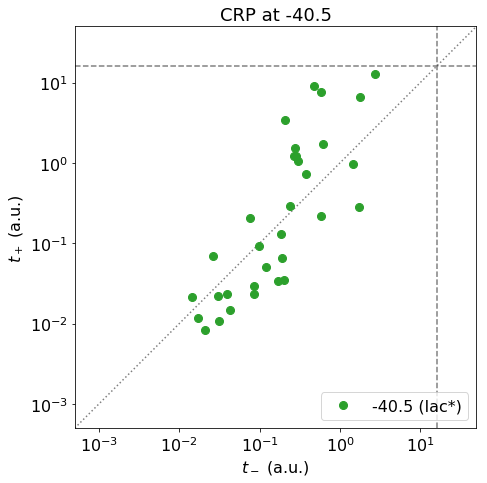

In [18]:
### CRP at -40.5

fig, ax = plt.subplots(figsize=big_figure)

# Plot styles
samples_labels_colors = [
    ('c40.10L', '-40.5 (lac*)', colors[2]),
]

# Plot measurements
ax.axhline(t_sat_best,linestyle='--',color='gray')
ax.axvline(t_sat_best,linestyle='--',color='gray')

plot_manifold_measurements(ax=ax, 
                           df=data_df, 
                           samples_labels_colors=samples_labels_colors, 
                           markersize=markersize, 
                           fontsize=fontsize)
ax.set_aspect('equal')
ax.set_title('CRP at -40.5', fontsize=titlesize)
plt.tight_layout()

fig.savefig('presentation_c40.pdf', transparent=True)

In [19]:
### Create Result comparison table ###
cols = [c for c in distance_df.columns if 'alpha_' in c]
df = distance_df[cols].copy()

gaston_dict = {
    -60.5: '3.85',
    -61.5: '9.05',
    -62.5: '4.22',
    -66.5: '0.78',
    -71.5: '2.50',
    -72.5: '3.49',
    -76.5: '0.54'
}
for k,v in gaston_dict.items():
    df.loc[-k,'gaston'] = v
    
ushida_dict = {
    -61.5: '20.6',
    -66.5: '0.84',
    -71.5: '16.4',
    -82.5: '6.99'
}

for k,v in ushida_dict.items():
    df.loc[-k,'ushida'] = v
    
df.fillna('',inplace=True)

print(df)
print('')

for pos, row in df.iterrows():
    
    # Compute alpha
    alpha = row['alpha_50']
    dalpha_plus = row['alpha_84'] - alpha
    dalpha_minus = alpha - row['alpha_16']
    
    # Compute energy
    DeltaG = -kbt_to_kcal*np.log(alpha)
    dDeltaG = 0.5*kbt_to_kcal*(np.log(row['alpha_84']) - np.log(row['alpha_16']))
    
#     if alpha > 100:
#         alpha_str = '$%d^{+%d}_{-%d}$'%(alpha, dalpha_plus, dalpha_minus)
#     elif alpha > 10:
#         alpha_str = '$%.1f^{+%.1f}_{-%.1f}$'%(alpha, dalpha_plus, dalpha_minus)
#     else:
#         alpha_str = '$%.2f^{+%.2f}_{-%.2f}$'%(alpha, dalpha_plus, dalpha_minus)
    if alpha > 100:
        alpha_str = '%d'%alpha
    elif alpha > 10:
        alpha_str = '%.1f'%alpha
    else:
        alpha_str = '%.2f'%alpha
    
    gaston = row['gaston']
    ushida = row['ushida']
    
    print('%.1f & $%.2f \\pm %.2f$ & %s & %s & %s \\\\'% (-pos, DeltaG, dDeltaG, alpha_str, gaston, ushida))

            alpha_16    alpha_50    alpha_84 gaston ushida
distance                                                  
60.5       13.528997   17.061405   21.379380   3.85       
61.5      532.047534  622.672065  702.797917   9.05   20.6
62.5       33.577280   44.301831   52.819310   4.22       
63.5        3.660232    4.208925    5.008052              
64.5        5.684136    7.066725    8.230884              
65.5        1.671516    1.803953    1.912341              
66.5        0.767150    0.796875    0.840191   0.78   0.84
71.5       85.598884   91.828895   99.750463   2.50   16.4
72.5       68.152351   74.906248   82.266384   3.49       
76.5        0.981870    1.092000    1.176756   0.54       
81.5        7.337244    8.904754   10.560538              
82.5        8.897171   11.851847   15.187331          6.99

-60.5 & $-1.75 \pm 0.14$ & 17.1 & 3.85 &  \\
-61.5 & $-3.97 \pm 0.09$ & 622 & 9.05 & 20.6 \\
-62.5 & $-2.34 \pm 0.14$ & 44.3 & 4.22 &  \\
-63.5 & $-0.89 \pm 0.10$ & 4.21 &  

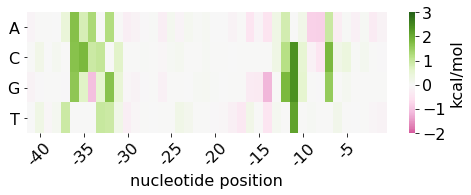

In [28]:
### Figure 7 ###

## Display scatter plot ##
fig, ax = plt.subplots(figsize=[7,3])


import seaborn as sns

matrix_df = pd.read_csv('../data/rnap_tau_final_all.41.matrix.txt', delim_whitespace=True)

# I'm pretty sure this is the lac* sequence
wt_seq = 'CAGGCTTTACACCTGTTGCCTCCGGCTCGTATGTTGTGTGG'
L = len(wt_seq)

for i, c in enumerate(wt_seq):
    matrix_df.loc[i,:] -= matrix_df.loc[i,c]

sns.heatmap(data=matrix_df.T, ax=ax, cmap="PiYG", center=0, vmax=3, vmin=-2, cbar_kws={'label': 'kcal/mol'})
ax.set_xticks(np.arange(1,L,5)+.5)
ax.set_xticklabels(np.arange(-L+1,0,5), rotation=45)
ax.set_yticks(np.arange(4)+.5)
ax.set_yticklabels(list('ACGT'), rotation=0)
#ax.set_aspect(4)
ax.set_xlabel('nucleotide position')
plt.tight_layout()
sns.reset_orig()


plt.savefig('presentation_emat.pdf', transparent=True)

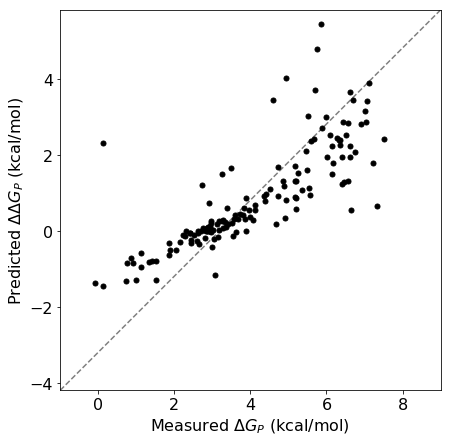

In [22]:

## Display scatter plot ##
fig, ax = plt.subplots(figsize=big_figure)

# Read in matrix vs. measurement data for log P
df = pd.read_csv('../data/18.04.25_matrix_vs_P.txt', sep='\t')

# Get normalized matrix energy
matrix_energy = -df['matrix_energy_kcal'].values
matrix_energy -= matrix_energy[0]

# Get measured energy
measured_energy = -df['log_P_kcal'].values

# Find b that minimizes sum((x+b-y)**2). Answer is simple:
b = matrix_energy.mean()-measured_energy.mean()

# Compute lims
xlim = np.array([-1,+9])
ylim = xlim+b

# Plot best-fit diagonal line
ax.plot(xlim, ylim, '--', color='gray')

# Plot data
ax.plot(measured_energy, matrix_energy, 'o', markersize=5, color='k')

# Style plot
ax.set_xlim(xlim)
ax.set_xlabel('Measured $\Delta G_P$ (kcal/mol)')
ax.set_ylim(ylim)
ax.set_ylabel('Predicted $\Delta\Delta G_P$ (kcal/mol)')
ax.set_aspect('equal')

### Add panel labels
# plt.figtext(.01,.98,'(A)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
# #plt.figtext(.01,.55,'(B)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
# plt.figtext(.52,.98,'(B)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')

plt.savefig('presentation_scatter.pdf', transparent=True)